In [1]:
import H_mag_funcs
import os
from astroquery.mpc import MPC
from pprint import pprint

In [2]:
excel_list = os.listdir(r"C:\Users\nagai\Documents\Aster BF")

## For one asteroid

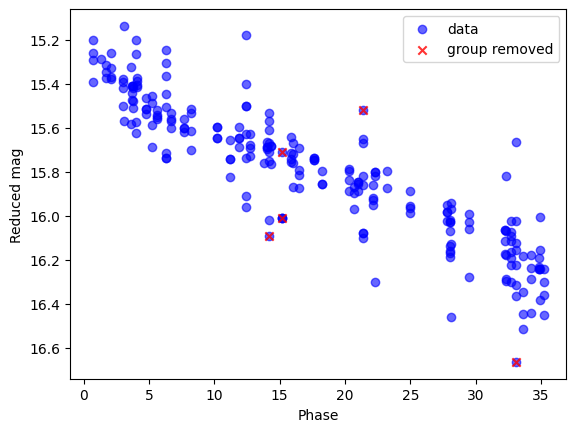

No RA or Dec provided but epoch and target found.
Querying ephemerides via IMCCE Miriade..
Saved figure under C:\Users\nagai\Documents\Asteroid work\\2435phunk_graph.jpg


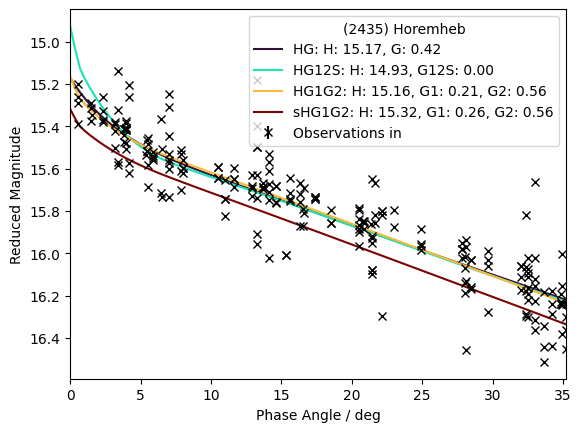

Average displacement HG1G2:  -0.008118416454912847


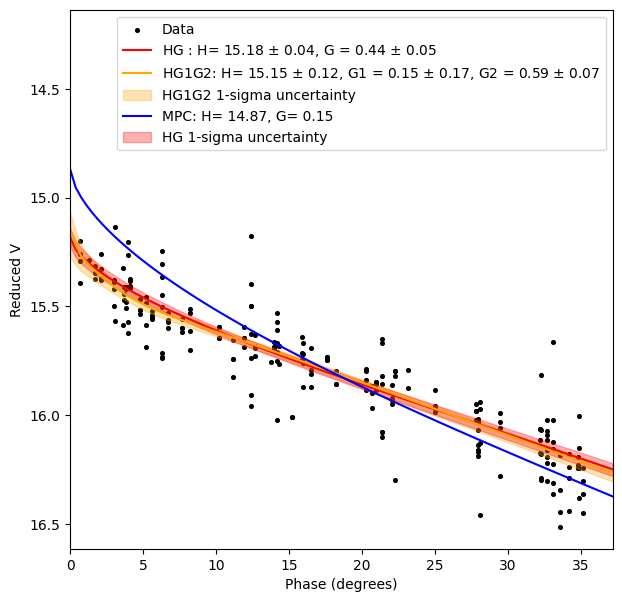

Average displacement HG:  0.0014824195382328043


In [9]:
path = r"C:\Users\nagai\Documents\Aster BF\\"
excel_file = '2435-excelBF.xlsx'

save_fig = True
save_path = r"C:\Users\nagai\Documents\Asteroid work\\"

asteroid_numb = "2435"
result = MPC.query_object('asteroid', number = asteroid_numb)
H_MPC = float(result[0]['absolute_magnitude'])
# saves the HG and HG1G2 displacement
H_displacement_list = H_mag_funcs.main(path, excel_file, asteroid_numb, H_MPC, contamination = 0.02, outlier_removing= False, plot_bool = True)

## For a list of asteroids

In [3]:
# put down the names of the excel files for each of the asteroids
excel_list = ["1205-excelBF", "1740-excelBF", "1818-excelB", "2607-excelB", 
             "2680-excelB", "2817-excelB", "2899-excelB", "3098-excelB"]


In [3]:
path = r"C:\Users\nagai\Documents\Aster BF\\"

H_dis_list = []
for excel_name in excel_list:
    try:
        asteroid_numb = excel_name.split("-")[0]
        result = MPC.query_object('asteroid', number = asteroid_numb)
        H_MPC = float(result[0]['absolute_magnitude'])
        # saves the HG and HG1G2 displacement
        H_displacement = H_mag_funcs.main(path, excel_name, asteroid_numb, H_MPC, contamination = 0.02, outlier_removing= False, plot_bool = False)
        H_dis_list.append(H_displacement)
    except:
        print (asteroid_numb)


Average displacement HG1G2:  0.07068579011359066
Average displacement HG:  0.12633845487740203
Average displacement HG1G2:  0.06800892088490329
Average displacement HG:  0.06031983382093209
Average displacement HG1G2:  0.1030478724034305
Average displacement HG:  0.11420816435195036
Average displacement HG1G2:  -0.03257633233762647
Average displacement HG:  -0.06257887204987433
Average displacement HG1G2:  -0.09051297265881164
Average displacement HG:  -0.08300336791908336
Average displacement HG1G2:  -0.05899596344625557
Average displacement HG:  -0.06329882858148572
Average displacement HG1G2:  -0.11833092756474972
Average displacement HG:  -0.11852878424184787
Average displacement HG1G2:  -0.06500845526514709
Average displacement HG:  -0.06050573811082849
Average displacement HG1G2:  0.10959247613502221
Average displacement HG:  0.11876071048560277
Average displacement HG1G2:  -0.046418149456394886
Average displacement HG:  -0.051160841561470605
1951
Average displacement HG1G2:  0.0

In [4]:
import numpy as np
H_dis_list = np.array(H_dis_list)
print ("Displacement needed for HG method:", np.median(H_dis_list[:,0]))
print ("Displacement needed for HG1G2 method:", np.median(H_dis_list[:,1]))

Displacement needed for HG method: -0.020329251676001192
Displacement needed for HG1G2 method: -0.01671350132889371


-0.01531519473911395


(array([ 1.,  0.,  0.,  0.,  0.,  1.,  3.,  2.,  3.,  6.,  3.,  4.,  3.,
        10.,  9., 13.,  5.,  8.,  8.,  3.,  6.,  5.,  2.,  0.,  1.,  0.,
         0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([-0.38067133, -0.35698216, -0.33329298, -0.30960381, -0.28591463,
        -0.26222545, -0.23853628, -0.2148471 , -0.19115792, -0.16746875,
        -0.14377957, -0.1200904 , -0.09640122, -0.07271204, -0.04902287,
        -0.02533369, -0.00164451,  0.02204466,  0.04573384,  0.06942301,
         0.09311219,  0.11680137,  0.14049054,  0.16417972,  0.1878689 ,
         0.21155807,  0.23524725,  0.25893642,  0.2826256 ,  0.30631478,
         0.33000395,  0.35369313,  0.37738231,  0.40107148,  0.42476066,
         0.44844983,  0.47213901,  0.49582819,  0.51951736,  0.54320654,
         0.56689572,  0.59058489,  0.61427407,  0.63796324,  0.66165242,
         0.6853416 ,  0.70903077,  0.73271995,  0.75640913,

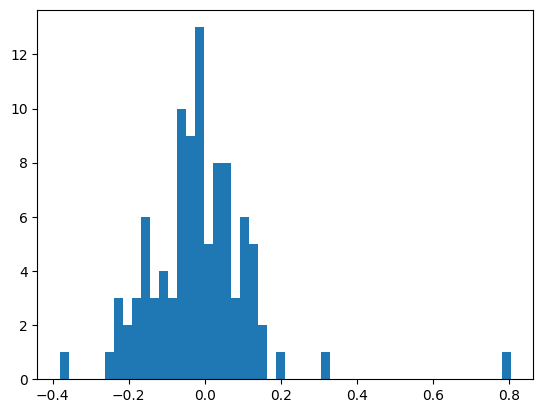

In [7]:
data = np.array(H_dis_list[:,0])
print (np.mean(H_dis_list[:,0]))
plt.hist(data, bins=50)

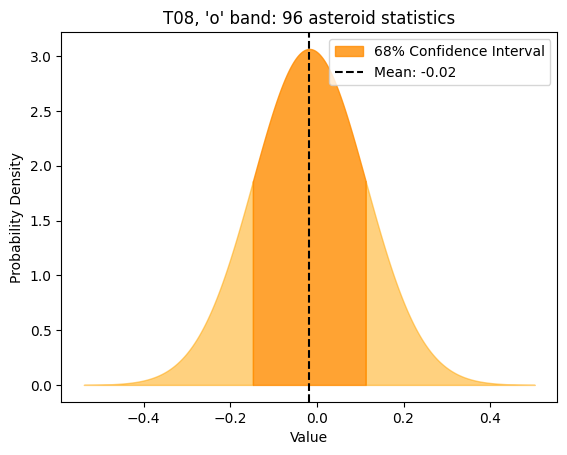

Mean: -0.018
Standard Deviation: 0.130
68% Confidence Interval: (-0.14775934063443624, 0.11249940922305142)


In [51]:
import matplotlib.pyplot as plt
from scipy.stats import norm

# Sample data: Replace this with your list of values
data = np.array(H_dis_list[:,0])

# Calculate mean and standard deviation
mean = np.mean(data)
std_dev = np.std(data, ddof=1)  # Using sample standard deviation (ddof=1)

# Generate Gaussian distribution
x = np.linspace(mean - 4*std_dev, mean + 4*std_dev, 1000)
pdf = norm.pdf(x, mean, std_dev)

# Calculate 68% confidence interval
conf_interval = (mean - std_dev, mean + std_dev)


x_fill = np.linspace(conf_interval[0], conf_interval[1], 500)
pdf_fill = norm.pdf(x_fill, mean, std_dev)

# Fill the outer region (outside 68% confidence interval)
x_outer_left = np.linspace(mean - 4*std_dev, conf_interval[0], 500)
x_outer_right = np.linspace(conf_interval[1], mean + 4*std_dev, 500)
pdf_outer_left = norm.pdf(x_outer_left, mean, std_dev)
pdf_outer_right = norm.pdf(x_outer_right, mean, std_dev)

plt.fill_between(x_outer_left, pdf_outer_left, color="orange", alpha=0.5)
plt.fill_between(x_outer_right, pdf_outer_right, color="orange", alpha=0.5)

# Fill the 68% confidence interval (darker orange)
plt.fill_between(x_fill, pdf_fill, color="darkorange", alpha=0.8, label="68% Confidence Interval")

# Labels and legend
plt.xlabel("Value")
plt.ylabel("Probability Density")
plt.title("T08, 'o' band: 96 asteroid statistics")
plt.axvline(mean, color='black', linestyle='dashed', label=f"Mean: {mean:.2f}")

plt.legend()
plt.savefig("Gaussian_T08o")
# Show plot
plt.show()

# Print results
print(f"Mean: {mean:.3f}")
print(f"Standard Deviation: {std_dev:.3f}")
print(f"68% Confidence Interval: {conf_interval}")


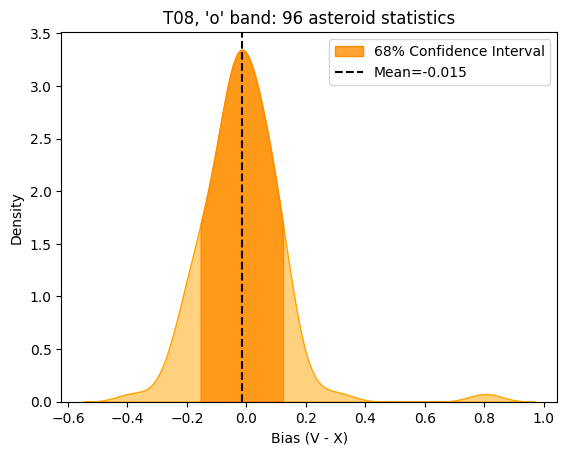

Mean: -0.015
Standard Deviation: 0.138
68% Confidence Interval: (-0.1536469732973811, 0.12301658381915322)


In [6]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate mean and standard deviation
mean = np.mean(data)
std_dev = np.std(data, ddof=1)

# Create KDE plot (smooth histogram)
sns.kdeplot(data, color="orange", fill=True, alpha=0.5)

# Define the 68% confidence interval
conf_interval = (mean - std_dev, mean + std_dev)

# Shade the 68% confidence region (dark orange)
x_fill = np.linspace(conf_interval[0], conf_interval[1], 500)
sns.kdeplot(data, fill=True, color="darkorange", alpha=0.8, clip=conf_interval, label="68% Confidence Interval")

# Add a vertical line for the mean
plt.axvline(mean, color='black', linestyle='dashed', label=f"Mean={mean:.3f}")

# Labels and legend
plt.xlabel("Bias (V - X)")
plt.ylabel("Density")
plt.title("T08, 'o' band: 96 asteroid statistics")
plt.legend()
#plt.grid()
plt.savefig("Gaussian_T08o")
# Show plot
plt.show()

# Print results
print(f"Mean: {mean:.3f}")
print(f"Standard Deviation: {std_dev:.3f}")
print(f"68% Confidence Interval: {conf_interval}")


In [1]:
- 0.08 - 0.014

-0.094

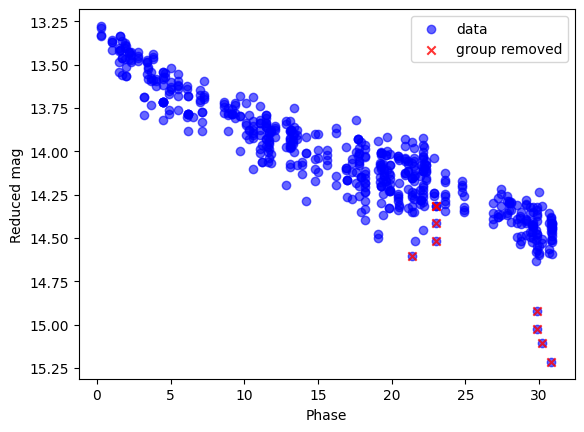

No RA or Dec provided but epoch and target found.
Querying ephemerides via IMCCE Miriade..
Saved figure under C:\Users\nagai\Documents\Asteroid work\\2680phunk_graph.jpg


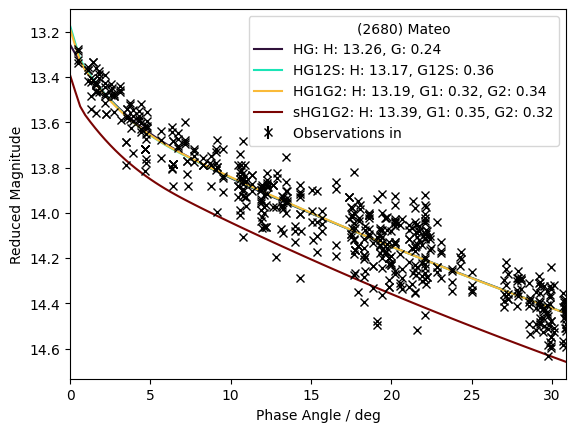

Average displacement HG1G2:  0.004344808078231566


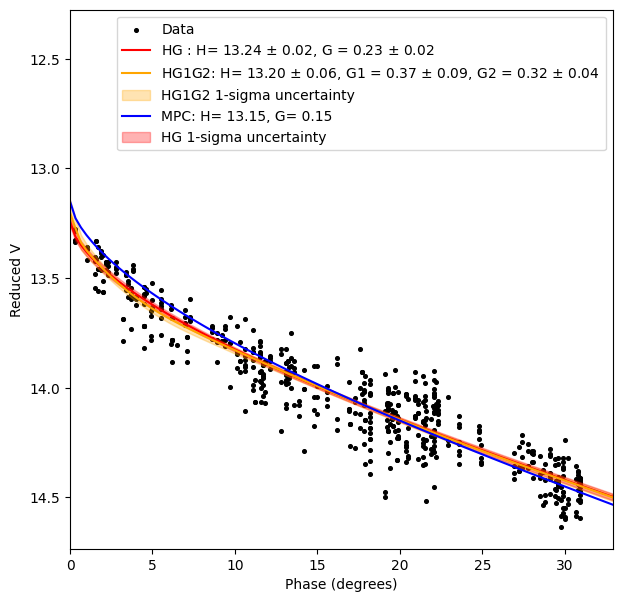

Average displacement HG:  0.005509066687231723


[0.005509066687231723, 0.004344808078231566]

In [62]:
path = r"C:\Users\nagai\Documents\Asteroid_excel_sheets\\"
excel_name = '2680-excelB'

save_fig = True
save_path = r"C:\Users\nagai\Documents\Asteroid work\\"

asteroid_numb = excel_name.split("-")[0]
result = MPC.query_object('asteroid', number = asteroid_numb)
H_MPC = float(result[0]['absolute_magnitude'])
H_mag_funcs.main(path, excel_name + ".xlsx", asteroid_numb, H_MPC, contamination = 0.04, outlier_removing= False, plot_bool = True)

In [99]:
import re

def extract_asteroid_data(filename):
    asteroid_ids = []
    H_values = []
    G_values = []
    
    # Match asteroid ID in the first 29 characters (e.g., "(26760)")
    asteroid_id_re = re.compile(r'^\s*\((\d+)\)')
    
    # This regex looks for a closing bracket, then optional spaces,
    # then a magnitude system indicator (1–2 uppercase letters),
    # then H value, its error, G value, and its error.
    # In your sample, this matches: "] R  15.09 0.1   0.05 0.05"
    mag_re = re.compile(
        r'\]\s*([A-Z]{1,2})\s+([-+]?\d*\.\d+|\d+)\s+'
        r'([-+]?\d*\.\d+|\d+)\s+([-+]?\d*\.\d+|\d+)\s+'
        r'([-+]?\d*\.\d+|\d+)'
    )
    
    with open(filename, 'r') as f:
        for line in f:
            line = line.rstrip('\n')
            if not line.strip() or line.startswith("AsterId"):
                continue  # skip header and empty lines

            # Extract asteroid ID from the first 29 characters.
            id_match = asteroid_id_re.match(line[:29])
            if not id_match:
                continue
            asteroid_id = int(id_match.group(1))
            
            # Look for the magnitude fields after the closing bracket.
            mag_match = mag_re.search(line)
            if not mag_match:
                continue  # Skip if H and G are not provided.
            
            try:
                # According to our regex:
                # group(2) is H, group(4) is G.
                H_val = float(mag_match.group(2))
                G_val = float(mag_match.group(4))
            except ValueError:
                continue
            
            asteroid_ids.append(asteroid_id)
            H_values.append(H_val)
            G_values.append(G_val)
    
    return asteroid_ids, H_values, G_values

if __name__ == '__main__':
    filename = r'C:\Users\nagai\Documents\Asteroid work\Database\newres.txt'
    ids, H_list, G_list = extract_asteroid_data(filename)


In [97]:
asteroid_ids = []
for excel_name in excel_list:
    asteroid_numb = int(excel_name.split("-")[0])
    asteroid_ids.append(asteroid_numb)

In [98]:
[i for i in ids if i in asteroid_ids]

[1951, 2131]

In [101]:
len(H_list)

867

In [94]:
ids

[]